In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
results_dir = '../evaluating_responses/part_1/'
results_dirb = '../evaluating_responses/part_1b/'

In [22]:
gemini = pd.read_csv(results_dirb+'gemini25_corrected.csv')
gemini.groupby(['Culture', 'Size', 'Remarks']).count()

Instance  Corrected  Correctness  \
Culture     Size Remarks                                                 
ic          10   Processed smoothly.        50         50           50   
            20   Processed smoothly.        50         50           50   
            50   Processed smoothly.        50         50           50   
womanmaster 10   Processed smoothly.        50         50           50   
            20   Processed smoothly.        50         50           50   
            50   Processed smoothly.        50         50           50   

                                      Blocking_Pair_Count  Blocking_Pair_List  \
Culture     Size Remarks                                                        
ic          10   Processed smoothly.                   50                  50   
            20   Processed smoothly.                   50                  50   
            50   Processed smoothly.                   50                  50   
womanmaster 10   Processed smoothly.                   50                  50   
            20   Processed smoothly.                   50                  50   
            50   Processed smoothly.                   50                  50   

                                      Jaccard_Similarity  Intersection  
Culture     Size Remarks                                                
ic          10   Processed smoothly.                  50            50  
            20   Processed smoothly.                  50            50  
            50   Processed smoothly.                  50            50  
womanmaster 10   Processed smoothly.                  50            50  
            20   Processed smoothly.                  50            50  
            50   Processed smoothly.                  50            50

In [23]:
gemini.groupby(['Culture', 'Size', 'Remarks']).mean(['Blocking_Pair_Count'])

Instance  Correctness  \
Culture     Size Remarks                                      
ic          10   Processed smoothly.      24.5         1.00   
            20   Processed smoothly.      24.5         0.88   
            50   Processed smoothly.      24.5         0.06   
womanmaster 10   Processed smoothly.      24.5         0.98   
            20   Processed smoothly.      24.5         0.94   
            50   Processed smoothly.      24.5         0.38   

                                      Blocking_Pair_Count  Jaccard_Similarity  \
Culture     Size Remarks                                                        
ic          10   Processed smoothly.                 0.00            1.000000   
            20   Processed smoothly.                 0.42            0.927448   
            50   Processed smoothly.                49.24            0.321208   
womanmaster 10   Processed smoothly.                 0.02            0.990769   
            20   Processed smoothly.                 0.06            0.980466   
            50   Processed smoothly.                34.10            0.699746   

                                      Intersection  
Culture     Size Remarks                            
ic          10   Processed smoothly.         10.00  
            20   Processed smoothly.         18.98  
            50   Processed smoothly.         21.82  
womanmaster 10   Processed smoothly.          9.94  
            20   Processed smoothly.         19.76  
            50   Processed smoothly.         38.76

In [4]:
from scipy.stats import fisher_exact, ttest_ind

models = ['gemini20', 'llama33', 'qwen_qwq', 'deepseek_dist', 'o3-mini', 'deepseek', 'gemini25']

for model in models:
    for culture in ['ic', 'womanmaster']:
        for size in [10, 20, 50]:
            vanilla = pd.read_csv(results_dir+f'{model}_corrected.csv')
            vanilla_bps = vanilla[(vanilla['Size'] == size) & (vanilla['Culture'] == culture)]['Blocking_Pair_Count'].values
            correct1 = sum(vanilla[(vanilla['Size'] == size) & (vanilla['Culture'] == culture)]['Correctness'].values)
            algo = pd.read_csv(results_dirb+f'{model}_corrected.csv')
            algo_bps = algo[(algo['Size'] == size) & (algo['Culture'] == culture)]['Blocking_Pair_Count'].values
            correct2 = sum(algo[(algo['Size'] == size) & (algo['Culture'] == culture)]['Correctness'].values)

            test = ttest_ind(vanilla_bps, algo_bps)
            if test.pvalue < 0.05: 
                print(model, size, culture, 'BPS')
                print(f'Vanilla: {round(sum(vanilla_bps)/len(vanilla_bps), 2)}')
                print(f'Algo: {round(sum(algo_bps)/len(algo_bps), 2)}')
                print(test)
                print()

            fdata = [
                [correct1, 50-correct1],
                [correct2, 50-correct2]
            ]
            stat, pval = fisher_exact(fdata)
            if pval < 0.05: 
                print(model, size, culture, 'ACC')
                print(f'Vanilla: {correct1}')
                print(f'Algo: {correct2}')
                print(test)
                print()

            print(model, size, culture, correct1*2, correct2*2)

            

gemini20 10 ic BPS
Vanilla: 6.34
Algo: 4.76
TtestResult(statistic=2.045106595555577, pvalue=0.043524793378884034, df=98.0)

gemini20 10 ic 6 10
gemini20 20 ic 0 0
gemini20 50 ic 0 0
gemini20 10 womanmaster 8 6
gemini20 20 womanmaster 0 0
gemini20 50 womanmaster 0 0
llama33 10 ic 0 0
llama33 20 ic 0 0
llama33 50 ic BPS
Vanilla: 232.1
Algo: 134.22
TtestResult(statistic=2.6898890424885074, pvalue=0.008402826911484898, df=98.0)

llama33 50 ic 0 0
llama33 10 womanmaster 2 6
llama33 20 womanmaster 0 0
llama33 50 womanmaster BPS
Vanilla: 296.14
Algo: 118.88
TtestResult(statistic=4.940773429457036, pvalue=3.2076302004205826e-06, df=98.0)

llama33 50 womanmaster 0 0
qwen_qwq 10 ic 28 34
qwen_qwq 20 ic 0 0
qwen_qwq 50 ic 0 0
qwen_qwq 10 womanmaster 20 30
qwen_qwq 20 womanmaster 0 0
qwen_qwq 50 womanmaster 0 0
deepseek_dist 10 ic 70 74
deepseek_dist 20 ic 0 4
deepseek_dist 50 ic BPS
Vanilla: 13.1
Algo: 84.98
TtestResult(statistic=-2.506816948198169, pvalue=0.01382750293237921, df=98.0)

deepseek_

new_order = {'Stable (Correct)': array([ 3,  3, 15, 50, 50, 49]), 'Unstable': array([47, 47, 35,  0,  0,  1]), 'Partial': array([0, 0, 0, 0, 0, 0]), 'Invalid': array([0, 0, 0, 0, 0, 0]), 'Fail': array([0, 0, 0, 0, 0, 0])}
index=['Llama-3.3-70B', 'Gemini-2.0-F', 'Qwen-QwQ-32B', 'OA-o3-mini', 'DeepSeek-R1', 'Gemini-2.5-P']
new_order = {'Stable (Correct)': array([ 0,  5, 17, 49, 48, 50]), 'Unstable': array([50, 45, 33,  1,  2,  0]), 'Partial': array([0, 0, 0, 0, 0, 0]), 'Invalid': array([0, 0, 0, 0, 0, 0]), 'Fail': array([0, 0, 0, 0, 0, 0])}
index=['Llama-3.3-70B', 'Gemini-2.0-F', 'Qwen-QwQ-32B', 'OA-o3-mini', 'DeepSeek-R1', 'Gemini-2.5-P']
new_order = {'Stable (Correct)': array([ 0,  0,  0, 43, 41, 47]), 'Unstable': array([50, 50, 36,  7,  9,  3]), 'Partial': array([0, 0, 2, 0, 0, 0]), 'Invalid': array([0, 0, 7, 0, 0, 0]), 'Fail': array([0, 0, 5, 0, 0, 0])}
index=['Llama-3.3-70B', 'Gemini-2.0-F', 'Qwen-QwQ-32B', 'OA-o3-mini', 'DeepSeek-R1', 'Gemini-2.5-P']
new_order = {'Stable (Correct)'

/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_82496/4230698086.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_82496/4230698086.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_82496/4230698086.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)
/var/folders/76/q6l8fqjj31n_72p5b5xz4vg40000gn/T/ipykernel_82496/4230698086.py:90: UserWarning: set_ticklabels() should only be used with a fixed numbe

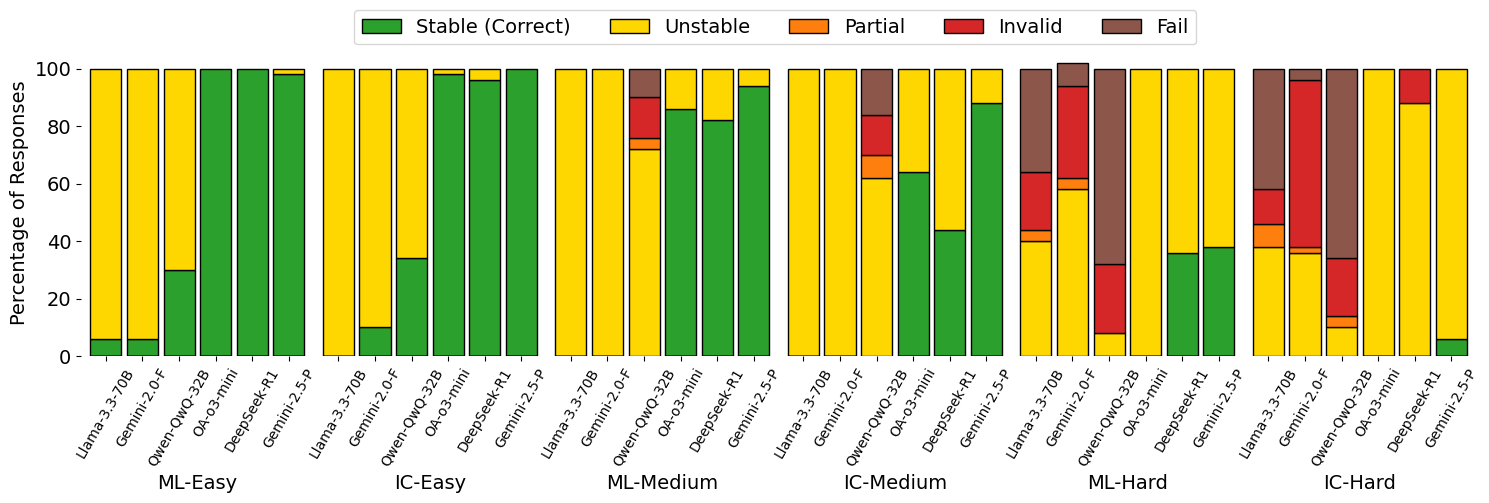

In [15]:
file_names = {
    'Llama-3.3-70B': 'llama33_corrected.csv',
    'Gemini-2.0-F': 'gemini20_corrected.csv',
    'Qwen-QwQ-32B': 'qwen_qwq_corrected.csv',
    # 'DeepSeek-70B': 'deepseek_dist_corrected.csv',
    'OA-o3-mini': 'o3-mini_corrected.csv',
    'DeepSeek-R1': 'deepseek_corrected.csv',
    'Gemini-2.5-P': 'gemini25_corrected.csv',
}

sizes = [10, 20, 50]
cultures = {
    'womanmaster': 'ML',
    'ic': 'IC', 
}
size_names = {
     10: "Easy",
     20: "Medium",
     50: "Hard"
}

no = []
treatments = []
index = [model for model in file_names]

for size in sizes:
    for culture in cultures:
        treatments.append(f'{cultures[culture]}-{size_names[size]}')
        invalids, stables, unstables, incompletes, emptys = [], [], [], [], []
        for model in file_names:
            data = pd.read_csv(results_dirb+file_names[model])
            invalids.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Remarks'] == 'INVALID MATCHING!')]))
            incompletes.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Remarks'] == 'INCOMPLETE MATCHING!')]))
            emptys.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Remarks'] == 'EMPTY/NO MATCHING!')]))
            stables.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Blocking_Pair_Count'] == 0) & (data['Remarks'] == 'Processed smoothly.')]))
            unstables.append(len(data[(data['Size'] == size) & (data['Culture'] == culture) & (data['Blocking_Pair_Count'] != 0) & (data['Remarks'] == 'Processed smoothly.')]))
        weight_counts = {
            "Stable (Correct)": np.array(stables),
            "Unstable": np.array(unstables),
            "Partial": np.array(incompletes),
            "Invalid": np.array(invalids),
            "Fail": np.array(emptys),
        }
        no.append(weight_counts)

def plot_stacked_graph(
            # self, 
            questions=[1,2,3,4,5,6], 
            title = 'Achieving_Stability', 
            figsize=(18,4), 
            labels_fontsize=14,
            ticks_fontsize=14,
            legend_fontsize=14,
            legend_pos=(0.75, 1.0),
        ):
        f, axs = plt.subplots(nrows=1, ncols=len(questions), sharey=True, figsize=figsize)
        plt.subplots_adjust(wspace=0)
        plt.tick_params(left = False)

        for j, question in enumerate(questions):
            # self.get_comparison(question, option, humans=humans)
            # ques_index = [self.index[ind] for ind in question_ordering[question]]
            ques_index = index
            new_order = {}
            # for key in self.metrics[f'q{question}']['order']:
                # new_order[key] = [self.metrics[f'q{question}']['order'][key][ind] for ind in question_ordering[question]]
            new_order = no[j]
            print(f"new_order = {new_order}\nindex={ques_index}")
            df = pd.DataFrame(data=new_order, index=ques_index)
            ax = df.plot(
                kind="bar", 
                ax=axs[j], 
                stacked=True, 
                rot=60, 
                width=0.85, 
                legend=False, 
                # color=['limegreen', 'palegreen', 'yellow', 'gold', 'orange', 'orangered'],
                color = ["tab:green", "gold", "tab:orange", "tab:red", "tab:brown"],
                edgecolor='black'
            ) 

            bars = ax.patches
            hatches = ''.join(h*len(df) for h in '\./')

            # for bar, hatch in zip(bars, hatches):
            #     bar.set_hatch(hatch)

            ax.set_xlabel(fr'{treatments[j]}', fontsize=labels_fontsize)
            ax.set_ylabel('Percentage of Responses', fontsize=labels_fontsize)
            ax.set_yticklabels([t*20 for t in range(6)], fontsize=ticks_fontsize)

            if j != 0:
                ax.spines['left'].set_visible(False)
                ax.tick_params(left=False)

            ax.spines['left'].set_visible(False)
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)

            handles, labels = ax.get_legend_handles_labels()
                

        f.legend(handles, labels, bbox_to_anchor=legend_pos, fontsize=legend_fontsize, ncol = 5)

        f.savefig(results_dir+f"{title}.pdf", bbox_inches="tight")

plot_stacked_graph()